# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
countries = pd.read_csv("countries.csv",thousands='.', decimal=',')

In [40]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [41]:
columns_to_fix= ['Pop_density',
                'Coastline_ratio',
                'Net_migration',
                'Infant_mortality',
                'Literacy',
                'Phones_per_1000',
                'Arable',
                'Crops',
                'Other',
                'Birthrate',
                'Deathrate',
                'Agriculture',
                'Industry',
                'Service']

In [42]:
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density         float64
Coastline_ratio     float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones_per_1000     float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

In [43]:
countries["Region"]=countries['Region'].str.strip()
countries["Country"]=countries['Country'].str.strip()

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [76]:
unique = countries['Region'].unique()
unique_sorted = list(np.sort(unique).tolist())

In [77]:
type(unique_sorted)

list

In [78]:
def q1():
    return unique_sorted

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [46]:
def q2():
    # Retorne aqui o resultado da questão 2.
    kbins=KBinsDiscretizer(10,encode="ordinal",strategy="quantile")
    interval=kbins.fit_transform(countries[['Pop_density']])
    return int((interval>=9).sum())
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [47]:
def q3():
    # Retorne aqui o resultado da questão 3.
    onesum=pd.get_dummies(countries[['Region', 'Climate']].fillna('NaN'))
    resultado = onesum.shape[1]
    return resultado

In [48]:
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [50]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [51]:
def istype(x):
    return x.select_dtypes(exclude='object')

In [52]:
def q4():
    # Retorne aqui o resultado da questão 4.
    pipe=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())
    pipe.fit(istype(countries))
    test_pipe=pipe.transform([test_country[2:]])
    return round(float(test_pipe[:,istype(countries).columns.get_loc("Arable")]),3)
    pass
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [53]:
countries_outlier=countries.copy()

In [54]:
countries_outlier['Net_migration'].dropna(inplace=True)

In [55]:
q1 = countries_outlier['Net_migration'].quantile(0.25)
q3 = countries_outlier['Net_migration'].quantile(0.75)
iqr = q3 - q1

non_outlier_interval_iqr = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]

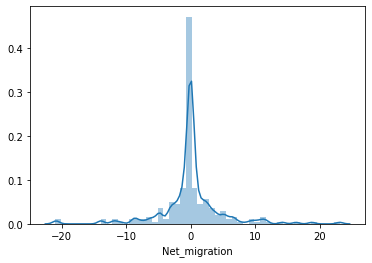

In [56]:
sns.distplot(countries_outlier['Net_migration'])

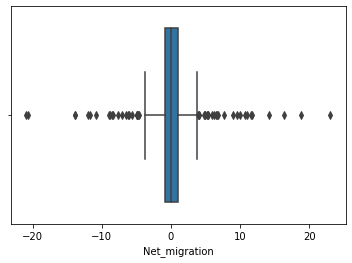

In [57]:
sns.boxplot(countries_outlier['Net_migration'])

In [58]:
outliers_iqr_acima = countries_outlier['Net_migration'][(countries_outlier['Net_migration'] > non_outlier_interval_iqr[1])]

In [59]:
outliers_iqr_baixo = countries_outlier['Net_migration'][(countries_outlier['Net_migration'] < non_outlier_interval_iqr[0])]

In [60]:
def q5():
    # Retorne aqui o resultado da questão 4.
    outliers_iqr_baixo = countries_outlier['Net_migration'][(countries_outlier['Net_migration'] < non_outlier_interval_iqr[0])]
    outliers_iqr_acima = countries_outlier['Net_migration'][(countries_outlier['Net_migration'] > non_outlier_interval_iqr[1])]
    return (int(outliers_iqr_baixo.count()),int(outliers_iqr_acima.count()),bool(0))
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [61]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [62]:
def q6():
    # Retorne aqui o resultado da questão 4.
    vec=CountVectorizer()
    count=vec.fit_transform(newsgroup.data)
    return int(count.toarray()[:,19211].sum())
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [63]:
def q7():
    # Retorne aqui o resultado da questão 4.
    tfidf=TfidfVectorizer()
    countidf=tfidf.fit_transform(newsgroup.data)
    return round(float(countidf.toarray()[:,19211].sum()),3)
q7()

8.888